crawl data from Wikipedia

In [15]:
# import wikipediaapi

# user_agent = "skipgram_embedding/1.0 (https://example.com; man26012003@outlook.com)"

# wiki_wiki = wikipediaapi.Wikipedia(
#     language='vi',
#     extract_format=wikipediaapi.ExtractFormat.WIKI,
#     user_agent=user_agent
# ) 

# page_title = "Tiếng Việt"

# page = wiki_wiki.page(page_title)

# if page.exists():
#     content = page.text
#     with open("data/raw/tam-cam.txt", "w", encoding="utf-8") as f:
#         f.write(content)

#     print(f"Content '{page_title}' saved into tam-cam.txt.")
# else:
#     print(f"Page '{page_title}' unexisted.")


Visualize the data

In [16]:
file_path = "data/raw/tam-cam.txt"
with open(file_path, "r", encoding="utf-8") as f:
    content = f.read()

print(content[:500])  

Ngày xửa ngày xưa, có hai chị em cùng cha khác mẹ là Tấm và Cám. Khi cha mất Tấm sống với dì ghẻ là mẹ của Cám. Bà mẹ ghẻ là người cay nghiệt, hàng ngày bắt Tấm làm hết mọi công việc trong nhà còn Cám

Một hôm bà mẹ bảo 2 chị em Tấm và Cám ra đồng bắt cá. Bà mẹ dặn: "Hễ đứa nào bắt được nhiều cá sẽ được thưởng". Ra đồng Tấm siêng năng và quen làm việc nên bắt được nhiều hơn, Cám biếng nhác nên không được con nào. Trên đường về nhà Cám tìm cách đánh lừa Tấm. Ngang chỗ ao kia Cám nói với Tấm:

- C


In [17]:
import re

# Số lượng ký tự
num_chars = len(content)

# Số lượng từ
num_words = len(content.split())

# Số lượng câu
num_sentences = len(re.split(r'[.!?]', content))

print(f"Characters: {num_chars}")
print(f"Words: {num_words}")
print(f"Sentences: {num_sentences}")


Characters: 7239
Words: 1679
Sentences: 103


In [18]:
from collections import Counter

words = content.split()
word_freq = Counter(words)

most_common_words = word_freq.most_common(10)
print("10 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

10 most common words:
Tấm: 60
ra: 26
con: 26
cho: 24
mẹ: 23
Cám: 21
bà: 20
về: 20
Hoàng: 19
nhà: 16


Chuyển văn bản thành chữ thường

In [19]:
content_lower = content.lower()
print(content_lower[:500])

ngày xửa ngày xưa, có hai chị em cùng cha khác mẹ là tấm và cám. khi cha mất tấm sống với dì ghẻ là mẹ của cám. bà mẹ ghẻ là người cay nghiệt, hàng ngày bắt tấm làm hết mọi công việc trong nhà còn cám

một hôm bà mẹ bảo 2 chị em tấm và cám ra đồng bắt cá. bà mẹ dặn: "hễ đứa nào bắt được nhiều cá sẽ được thưởng". ra đồng tấm siêng năng và quen làm việc nên bắt được nhiều hơn, cám biếng nhác nên không được con nào. trên đường về nhà cám tìm cách đánh lừa tấm. ngang chỗ ao kia cám nói với tấm:

- c


Loại bỏ dấu câu và ký tự đặc biệt

In [20]:
import re

content_cleaned = re.sub(r"[^a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ\s]", "", content_lower)
print(content_cleaned[:500]) 


ngày xửa ngày xưa có hai chị em cùng cha khác mẹ là tấm và cám khi cha mất tấm sống với dì ghẻ là mẹ của cám bà mẹ ghẻ là người cay nghiệt hàng ngày bắt tấm làm hết mọi công việc trong nhà còn cám

một hôm bà mẹ bảo  chị em tấm và cám ra đồng bắt cá bà mẹ dặn hễ đứa nào bắt được nhiều cá sẽ được thưởng ra đồng tấm siêng năng và quen làm việc nên bắt được nhiều hơn cám biếng nhác nên không được con nào trên đường về nhà cám tìm cách đánh lừa tấm ngang chỗ ao kia cám nói với tấm

 chị tấm ơi chị t


In [21]:
from pyvi import ViTokenizer

content_tokenized = ViTokenizer.tokenize(content_cleaned)

file_path = "data/clean/clean_tam-cam.txt"

with open(file_path, "w", encoding="utf-8") as f:
    f.write(content_tokenized)

print("Data saved into clean_tam-cam.txt")


Data saved into clean_tam-cam.txt


Loại bỏ stopwords

In [23]:
with open("lib/vietnamese-stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

file_path = "data/clean/clean_tam-cam.txt"
with open(file_path, "r", encoding="utf-8") as f:
    words = f.read().split()

# Loại bỏ stopwords trong từng câu
filtered_words = [word for word in words if word not in stopwords]

# Lưu văn bản đã loại bỏ stopwords vào file mới
file_path = "data/clean/clean_tam-cam.txt"
with open(file_path, "w", encoding="utf-8") as f:
    f.write(" ".join(filtered_words))

Tạo từ điển từ vựng

In [24]:
file_path = "data/clean/clean_tam-cam.txt"
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read().split()

vocabulary = sorted(set(text))

file_path = "data/clean/vocabulary.txt"
with open(file_path, "w", encoding="utf-8") as f:
    f.write("\n".join(vocabulary))

# In ra số lượng từ trong từ điển không chứa stopwords
print(f"Words in vocabulary: {len(vocabulary)}")



Words in vocabulary: 362


Tạo cặp từ trung tâm - ngữ cảnh

In [25]:
def generate_skipgram_pairs(tokenized_sentences, window_size):
    pairs = []
    for sentence in tokenized_sentences:
        words = sentence.split()  # Tách từ trong câu
        for i, center_word in enumerate(words):
            # Xác định các từ ngữ cảnh trong phạm vi cửa sổ
            for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
                if i != j:  # Bỏ qua từ trung tâm
                    pairs.append((center_word, words[j]))
    return pairs

file_path = "data/clean/clean_tam-cam.txt"
with open(file_path, "r", encoding="utf-8") as f:
    tokenized_sentences = f.readlines()  

window_size = 2
skipgram_pairs = generate_skipgram_pairs(tokenized_sentences, window_size)

print(skipgram_pairs[:10])

with open("data/clean/skipgram_pairs.txt", "w", encoding="utf-8") as f:
    for pair in skipgram_pairs:
        f.write(f"{pair[0]} {pair[1]}\n")

print(f"Skip-gram pairs saved into skipgram_pairs.txt. Total pairs: {len(skipgram_pairs)}")


[('xửa', 'ngày_xưa'), ('xửa', 'hai'), ('ngày_xưa', 'xửa'), ('ngày_xưa', 'hai'), ('ngày_xưa', 'chị_em'), ('hai', 'xửa'), ('hai', 'ngày_xưa'), ('hai', 'chị_em'), ('hai', 'mẹ'), ('chị_em', 'ngày_xưa')]
Skip-gram pairs saved into skipgram_pairs.txt. Total pairs: 3050


Initialize the model

In [26]:
import numpy as np

class skipGram():
    def __init__(self, vocab_size=len(vocabulary), embedding_size=100, learning_rate=0.01):
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size 
        self.learning_rate = learning_rate
        self.W1 = np.random.uniform(-0.01, 0.01, (vocab_size, embedding_size))
        self.W2 = np.random.uniform(-0.01, 0.01, (embedding_size, vocab_size))

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    def forward(self, center_word_idx):
        """
        Lan truyền tiến.
        
        Parameters:
        center_word_idx: Chỉ số của từ trung tâm.
        
        Returns:
        hidden_layer: Vector nhúng của từ trung tâm (1 x d).
        output_layer: Đầu ra trước softmax (1 x |V|).
        y_pred: Xác suất dự đoán (1 x |V|).
        """
        hidden_layer = self.W1[center_word_idx]
        output_layer = np.dot(hidden_layer, self.W2) 
        y_pred = self.softmax(output_layer) 

        return hidden_layer, output_layer, y_pred
    
    def cross_entropy_loss(self, y_pred, y):
        return -np.sum(y * np.log(y_pred + 1e-8)) 
    
    def backpropagate(self, center_word_idx, context_word_idx, hidden_layer, y_pred):
        """
        Lan truyền ngược.
        
        Parameters:
        center_word_idx: Chỉ số của từ trung tâm.
        context_word_idx: Chỉ số của từ ngữ cảnh.
        h: Vector nhúng từ trung tâm.
        y_pred: Xác suất dự đoán từ lan truyền tiến.
        """
        # Tạo vector one-hot cho từ ngữ cảnh
        y = np.zeros(self.vocab_size)
        y[context_word_idx] = 1
        
        # calculate error
        error = y_pred - y  # [1 x |V|]
        
        # update W2
        W2_new = np.outer(hidden_layer, error)  # [d x |V|]
        self.W2 -= self.learning_rate * W2_new
        
        # update W1
        W1_new = np.dot(self.W2, error)  # [1 x d]
        self.W1[center_word_idx] -= self.learning_rate * W1_new

    def train(self, training_data, epochs, batch_size, patience=500):
        """
        Huấn luyện mô hình Skip-Gram với cơ chế Early Stopping.

        Parameters:
            training_data (list): Dữ liệu huấn luyện, gồm các cặp (center_word_idx, context_word_idx).
            epochs (int): Tổng số epoch huấn luyện.
            batch_size (int): Kích thước batch.
            patience (int): Số epoch tối đa không giảm loss trước khi dừng.
        Returns:
            loss_history (list): Danh sách loss trung bình sau mỗi epoch.
        """
        loss_history = []
        num_batches = len(training_data) // batch_size  # Tổng số batch
        best_loss = float('inf')  # Loss tốt nhất ban đầu
        patience_counter = 0      # Bộ đếm cho Early Stopping

        for epoch in range(epochs):
            np.random.shuffle(training_data)  # Shuffle dữ liệu mỗi epoch
            total_loss = 0

            for batch_start in range(0, len(training_data), batch_size):
                batch = training_data[batch_start:batch_start + batch_size]
                batch_loss = 0

                # Gradient trung bình cho cả batch
                W1_gradient = np.zeros_like(self.W1)
                W2_gradient = np.zeros_like(self.W2)

                for center_word_idx, context_word_idx in batch:
                    # Lan truyền tiến
                    hidden_layer, output_layer, y_pred = self.forward(center_word_idx)

                    # Tính mất mát
                    loss = self.cross_entropy_loss(y_pred, np.eye(self.vocab_size)[context_word_idx])
                    batch_loss += loss

                    # Lan truyền ngược và tích lũy gradient
                    y = np.zeros(self.vocab_size)
                    y[context_word_idx] = 1
                    error = y_pred - y

                    W2_gradient += np.outer(hidden_layer, error)  # Gradient của W2
                    W1_gradient[center_word_idx] += np.dot(self.W2, error)  # Gradient của W1

                # Chia trung bình gradient
                W2_gradient /= batch_size
                W1_gradient /= batch_size

                # Cập nhật trọng số
                self.W2 -= self.learning_rate * W2_gradient
                self.W1 -= self.learning_rate * W1_gradient

                total_loss += batch_loss / batch_size

            # Tính loss trung bình cho epoch
            avg_loss = total_loss / num_batches
            loss_history.append(avg_loss)

            # In loss mỗi epoch
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

            # Kiểm tra Early Stopping
            if avg_loss < best_loss:
                best_loss = avg_loss
                patience_counter = 0  # Reset bộ đếm nếu loss giảm
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f"Early Stopping tại Epoch {epoch + 1}, Loss: {avg_loss:.4f}")
                break

        return loss_history

    def get_embedding(self, word_idx):
        """
        Lấy vector nhúng cho một từ dựa trên chỉ số.
        """
        return self.W1[word_idx]
    
    def similarity(self, word_idx1, word_idx2):
        """
        Tính độ tương đồng cosine giữa hai từ.
        
        Parameters:
        word_idx1, word_idx2: Chỉ số của hai từ cần so sánh.
        """
        vec1 = self.get_embedding(word_idx1)
        vec2 = self.get_embedding(word_idx2)

        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            

In [27]:
# Đọc từ điển
file_path = "data/clean/vocabulary.txt"
with open(file_path, "r", encoding="utf-8") as f:
    vocabulary = f.read().splitlines()

# Tạo ánh xạ từ -> số
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

# Đọc các cặp từ skip-gram
file_path = "data/clean/skipgram_pairs.txt"
with open("data/clean/skipgram_pairs.txt", "r", encoding="utf-8") as f:
    pairs = [line.strip().split() for line in f.readlines()]

# Chuyển đổi cặp từ thành cặp chỉ số
training_data = [(word_to_idx[center], word_to_idx[context]) for center, context in pairs]


In [28]:
embedding_size = 100
learning_rate = 0.01
window_size = 2
epochs = 5000
batch_size = 16
vocab_size = len(vocabulary)
skipgram_model = skipGram(vocab_size, embedding_size, learning_rate)

loss_history = skipgram_model.train(
    training_data=training_data, 
    epochs=epochs, 
    batch_size=batch_size, 
    patience=500
)


Epoch 1/5000, Loss: 5.9110
Epoch 2/5000, Loss: 5.9110
Epoch 3/5000, Loss: 5.9110
Epoch 4/5000, Loss: 5.9110
Epoch 5/5000, Loss: 5.9110
Epoch 6/5000, Loss: 5.9110
Epoch 7/5000, Loss: 5.9110
Epoch 8/5000, Loss: 5.9110
Epoch 9/5000, Loss: 5.9110
Epoch 10/5000, Loss: 5.9110
Epoch 11/5000, Loss: 5.9110
Epoch 12/5000, Loss: 5.9110
Epoch 13/5000, Loss: 5.9109
Epoch 14/5000, Loss: 5.9109
Epoch 15/5000, Loss: 5.9109
Epoch 16/5000, Loss: 5.9109


KeyboardInterrupt: 

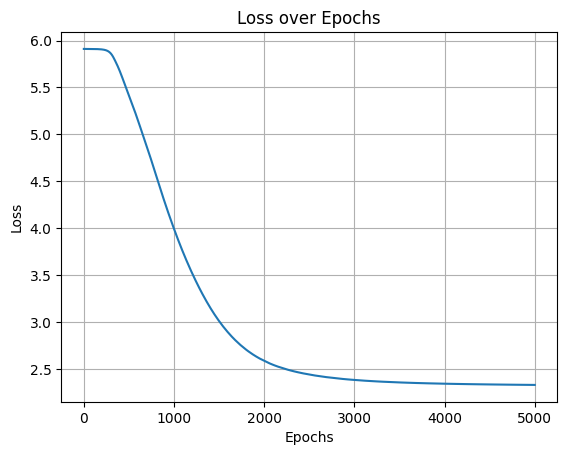

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(loss_history) + 1), loss_history, linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')


plt.grid(True)
plt.show()

Đánh giá tương đồng từ vựng:
Cosine similarity giữa 'mẹ' và 'dì_ghẻ': 0.6465
Cosine similarity giữa 'lúa' và 'gạo': 0.5695
Cosine similarity giữa 'ăn_mày' và 'ăn_xin': 0.5433
Cosine similarity giữa 'hoàng_hậu' và 'hoàng_tử': 0.3073
Cosine similarity giữa 'vui_mừng' và 'tái_mặt': -0.3495
Cosine similarity giữa 'buồn' và 'vui': -0.3657

Các từ gần nhất với 'mẹ':
 - dì_ghẻ: 0.6465
 - đứa: 0.6231
 - sống: 0.5779
 - lắm: 0.5618
 - tức: 0.5302
None


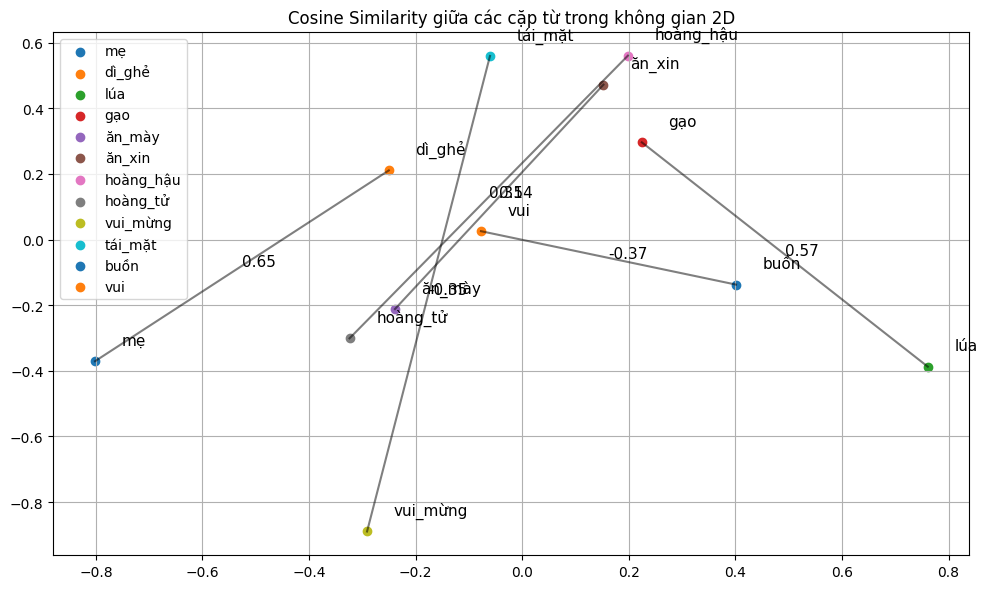

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Bộ từ đôi để đánh giá
word_pairs = [       
    ("mẹ", "dì_ghẻ"),
    ("lúa", "gạo"),                       
    ("ăn_mày", "ăn_xin"),
    ("hoàng_hậu", "hoàng_tử"),
    ("vui_mừng", "tái_mặt"),
    ("buồn", "vui"), 
]           

# Hàm tìm các từ gần nhất
def find_nearest_neighbors(model, target_word, word_to_idx, idx_to_word, top_n=5):
    if target_word not in word_to_idx:
        print(f"Từ '{target_word}' không có trong từ điển!")
        return
    
    # Vector embedding của từ mục tiêu
    target_idx = word_to_idx[target_word]
    target_vec = model.get_embedding(target_idx)
    
    similarities = []
    for word, idx in word_to_idx.items():
        if word == target_word:
            continue
        # Tính cosine similarity
        similarity = np.dot(target_vec, model.get_embedding(idx)) / (
            np.linalg.norm(target_vec) * np.linalg.norm(model.get_embedding(idx))
        )
        similarities.append((word, similarity))
    
    # Sắp xếp theo độ tương đồng
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]
    print(f"\nCác từ gần nhất với '{target_word}':")
    for word, sim in similarities:
        print(f" - {word}: {sim:.4f}")

# Hàm đánh giá cosine similarity giữa các cặp từ
def evaluate_embeddings(model, word_pairs, word_to_idx):
    print("Đánh giá tương đồng từ vựng:")
    for word1, word2 in word_pairs:
        if word1 in word_to_idx and word2 in word_to_idx:
            idx1 = word_to_idx[word1]
            idx2 = word_to_idx[word2]
            # Tính cosine similarity
            similarity = np.dot(model.get_embedding(idx1), model.get_embedding(idx2)) / (
                np.linalg.norm(model.get_embedding(idx1)) * np.linalg.norm(model.get_embedding(idx2))
            )
            print(f"Cosine similarity giữa '{word1}' và '{word2}': {similarity:.4f}")
        else:
            print(f"Không tìm thấy '{word1}' hoặc '{word2}' trong từ điển.")

def plot_similarity_2d(word_pairs, model, word_to_idx):
    similarities = []
    pair_labels = []
    word_coords = {}  # Chứa tọa độ của từng từ

    # Tính cosine similarity và tọa độ của các từ
    for word1, word2 in word_pairs:
        if word1 in word_to_idx and word2 in word_to_idx:
            idx1 = word_to_idx[word1]
            idx2 = word_to_idx[word2]
            sim = np.dot(model.get_embedding(idx1), model.get_embedding(idx2)) / (
                np.linalg.norm(model.get_embedding(idx1)) * np.linalg.norm(model.get_embedding(idx2))
            )
            similarities.append(sim)
            pair_labels.append(f"{word1}-{word2}")
            
            # Lưu tọa độ các từ trong không gian 2D (sử dụng PCA để giảm chiều)
            word_coords[word1] = model.get_embedding(idx1)[:2]  
            word_coords[word2] = model.get_embedding(idx2)[:2]  
        else:
            similarities.append(0)
            pair_labels.append(f"{word1}-{word2} (not found)")

    # Vẽ các từ trong không gian 2D
    plt.figure(figsize=(10, 6))
    for word, coord in word_coords.items():
        plt.scatter(coord[0], coord[1], label=word)
        plt.text(coord[0] + 0.05, coord[1] + 0.05, word, fontsize=11)

    # Vẽ các cặp từ và cosine similarity
    for i, (word1, word2) in enumerate(word_pairs):
        if word1 in word_to_idx and word2 in word_to_idx:
            coord1 = word_coords[word1]
            coord2 = word_coords[word2]
            sim = similarities[i]
            plt.plot([coord1[0], coord2[0]], [coord1[1], coord2[1]], 'k-', alpha=0.5)
            plt.text((coord1[0] + coord2[0]) / 2, (coord1[1] + coord2[1]) / 2, f"{sim:.2f}", fontsize=11)

    plt.title("Cosine Similarity giữa các cặp từ trong không gian 2D")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

evaluate_embeddings(skipgram_model, word_pairs, word_to_idx)
target_word = "mẹ"  
result = find_nearest_neighbors(skipgram_model, target_word, word_to_idx, idx_to_word, top_n=5)
print(result)
plot_similarity_2d(word_pairs, skipgram_model, word_to_idx)


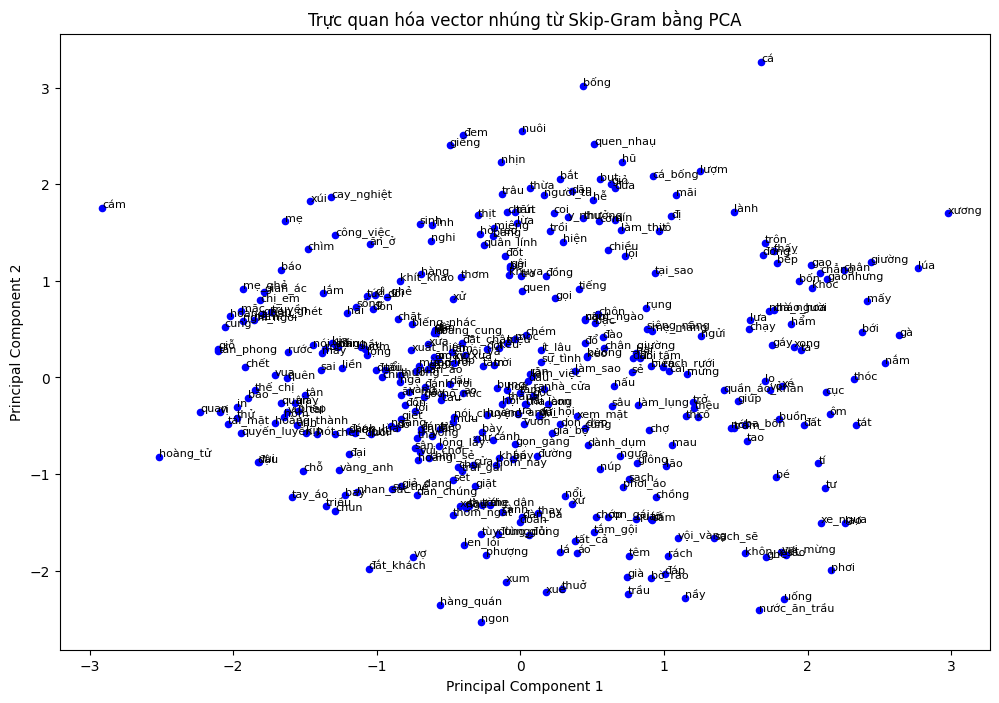

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Giả định vector nhúng và từ vựng
embeddings = skipgram_model.W1  # Ma trận vector nhúng (vocab_size x embedding_size)
vocab = vocabulary     # Danh sách từ vựng

# Giảm chiều vector nhúng bằng PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=20, color='blue')

# Gắn nhãn từng từ
for i, word in enumerate(vocab):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

plt.title("Trực quan hóa vector nhúng từ Skip-Gram bằng PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
